In [24]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
import cv2

In [25]:
img = cv2.imread('treeimg.jpg')
img.shape

(797, 1280, 3)

In [27]:
imgs = io.imread("treeimg.jpg")
imgs.shape

(797, 1280, 3)

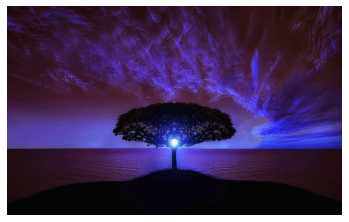

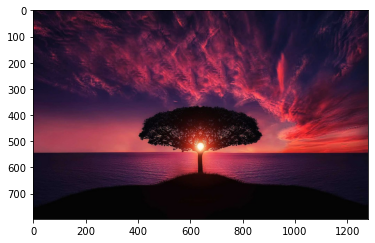

In [30]:
plt.imshow(img)
plt.axis('off')
plt.show()
plt.imshow(imgs)

In [6]:
img

array([[[11, 11, 23],
        [12, 12, 24],
        [14, 14, 26],
        ...,
        [13, 12, 30],
        [13, 12, 30],
        [13, 12, 30]],

       [[11, 11, 23],
        [12, 12, 24],
        [14, 14, 26],
        ...,
        [13, 12, 30],
        [13, 12, 30],
        [13, 12, 30]],

       [[12, 10, 23],
        [13, 11, 24],
        [14, 12, 25],
        ...,
        [13, 12, 30],
        [13, 12, 30],
        [13, 12, 30]],

       ...,

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]]], dtype=uint8)

In [7]:
imgnew = img.reshape(img.shape[0]*img.shape[1],img.shape[2])
imgnew.shape

(1020160, 3)

In [8]:
from sklearn.mixture import GaussianMixture
gmm_5 = GaussianMixture(n_components=5, max_iter=10000,random_state = 10)
gmm_5.fit(imgnew)
labels_gmm_5 = gmm_5.predict(imgnew)

In [50]:
gmm_5.means_

array([[ 36.182542  ,  20.72019657,  48.66485153],
       [134.15408718,  47.87199044,  74.96010579],
       [  5.83581979,   3.77052253,   4.45895495],
       [ 59.66029354,  23.60236102,  45.77476223],
       [210.15974342,  85.0495907 ,  84.25021815]])

In [10]:
Ccentres_gmm_5 = gmm_5.means_.astype(int)
Ccentres_gmm_5

array([[ 36,  20,  48],
       [134,  47,  74],
       [  5,   3,   4],
       [ 59,  23,  45],
       [210,  85,  84]])

In [11]:
newimage_gmm_5 = []
for i in range(len(labels_gmm_5)):
    newimage_gmm_5.append(Ccentres_gmm_5[labels_gmm_5[i]])

In [12]:
newimage_gmm_5 = np.array(newimage_gmm_5)
newimage_gmm_5,type(newimage_gmm_5)

(array([[36, 20, 48],
        [59, 23, 45],
        [59, 23, 45],
        ...,
        [ 5,  3,  4],
        [ 5,  3,  4],
        [ 5,  3,  4]]),
 numpy.ndarray)

In [13]:
newimage_gmm_5 = newimage_gmm_5.reshape(img.shape[0],img.shape[1],img.shape[2])
newimage_gmm_5.shape


(797, 1280, 3)

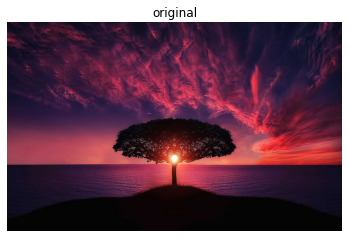

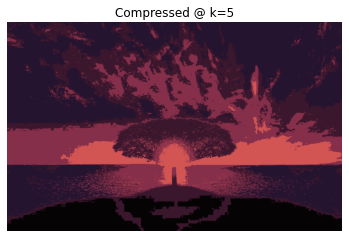

In [14]:
plt.figure(0)
plt.axis('off')
plt.title('original')
plt.imshow(img)
plt.show()
plt.figure(4)
plt.axis('off')
plt.title('Compressed @ k=5')
plt.imshow(newimage_gmm_5)
plt.show()

In [31]:
gmm_10 = GaussianMixture(n_components=10, max_iter=10000,random_state = 10)
gmm_10.fit(imgnew)
labels_gmm_10 = gmm_10.predict(imgnew)

In [32]:
gmm_10.means_

array([[ 35.5628621 ,  20.32498762,  47.66945477],
       [ 99.05409839,  25.11479271,  34.94278249],
       [ 17.11787368,  10.58445203,  22.29633596],
       [220.26181543,  87.61190032,  85.65052772],
       [106.94775445,  38.82055311,  74.04221574],
       [  5.83587909,   3.77051511,   4.45896977],
       [148.16640189,  52.62652714,  82.93150934],
       [ 69.85071802,  29.51720609,  61.3704589 ],
       [130.74276901,  82.62415893,  94.02143981],
       [177.45877403,  74.716663  ,  90.3642821 ]])

In [33]:
Ccentres_gmm_10 = gmm_10.means_.astype(int)
Ccentres_gmm_10

array([[ 35,  20,  47],
       [ 99,  25,  34],
       [ 17,  10,  22],
       [220,  87,  85],
       [106,  38,  74],
       [  5,   3,   4],
       [148,  52,  82],
       [ 69,  29,  61],
       [130,  82,  94],
       [177,  74,  90]])

In [34]:
newimage_gmm_10 = []
for i in range(len(labels_gmm_10)):
    newimage_gmm_10.append(Ccentres_gmm_10[labels_gmm_10[i]])

In [35]:
newimage_gmm_10 = np.array(newimage_gmm_10)
newimage_gmm_10,type(newimage_gmm_10)

(array([[17, 10, 22],
        [17, 10, 22],
        [17, 10, 22],
        ...,
        [ 5,  3,  4],
        [ 5,  3,  4],
        [ 5,  3,  4]]),
 numpy.ndarray)

In [36]:
newimage_gmm_10 = newimage_gmm_10.reshape(img.shape[0],img.shape[1],img.shape[2])
newimage_gmm_10.shape

(797, 1280, 3)

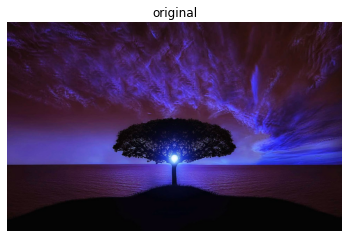

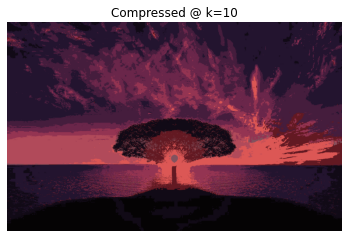

In [37]:
plt.figure(0)
plt.axis('off')
plt.title('original')
plt.imshow(img)
plt.show()
plt.figure(3)
plt.axis('off')
plt.title('Compressed @ k=10')
plt.imshow(newimage_gmm_10)
plt.show()

In [38]:
gmm_20 = GaussianMixture(n_components=20, max_iter=10000,random_state = 10)
gmm_20.fit(imgnew)
labels_gmm_20 = gmm_20.predict(imgnew)

In [39]:
gmm_20.means_

array([[ 46.43921665,  23.4733049 ,  54.20357327],
       [133.26670027,  35.31655609,  61.91461946],
       [ 35.29456917,  18.5354508 ,  42.26016629],
       [204.82822771,  94.06001016,  98.89942534],
       [111.57650652,  39.94508773,  75.38460779],
       [  5.8358508 ,   3.77051865,   4.4589627 ],
       [141.58515814,  51.79000508,  85.83829228],
       [ 56.85906803,  31.55628544,  71.50389964],
       [238.9932882 , 107.22737803,  93.69683786],
       [177.9345353 ,  65.16795382,  94.02064724],
       [ 14.13031849,   4.95168216,   6.2125229 ],
       [183.04867703,  41.82651283,  40.95082791],
       [163.37645328,  66.43336694,  86.01646237],
       [ 68.80676713,  26.25138083,  54.24082393],
       [251.62827731, 199.92787249, 169.2691721 ],
       [ 87.37153738,  34.17674192,  66.92757199],
       [ 27.67276821,  18.98583274,  44.66578453],
       [ 47.07661373,  15.09389545,  28.49471636],
       [210.5673789 ,  74.27495526,  78.89291744],
       [132.16184146,  65.26140

In [40]:
Ccentres_gmm_20 = gmm_20.means_.astype(int)
Ccentres_gmm_20

array([[ 46,  23,  54],
       [133,  35,  61],
       [ 35,  18,  42],
       [204,  94,  98],
       [111,  39,  75],
       [  5,   3,   4],
       [141,  51,  85],
       [ 56,  31,  71],
       [238, 107,  93],
       [177,  65,  94],
       [ 14,   4,   6],
       [183,  41,  40],
       [163,  66,  86],
       [ 68,  26,  54],
       [251, 199, 169],
       [ 87,  34,  66],
       [ 27,  18,  44],
       [ 47,  15,  28],
       [210,  74,  78],
       [132,  65,  80]])

In [41]:
newimage_gmm_20 = []
for i in range(len(labels_gmm_20)):
    newimage_gmm_20.append(Ccentres_gmm_20[labels_gmm_20[i]])

In [42]:
newimage_gmm_20 = np.array(newimage_gmm_20)
newimage_gmm_20,type(newimage_gmm_20)

(array([[27, 18, 44],
        [27, 18, 44],
        [27, 18, 44],
        ...,
        [ 5,  3,  4],
        [ 5,  3,  4],
        [ 5,  3,  4]]),
 numpy.ndarray)

In [43]:
newimage_gmm_20 = newimage_gmm_20.reshape(img.shape[0],img.shape[1],img.shape[2])
newimage_gmm_20.shape

(797, 1280, 3)

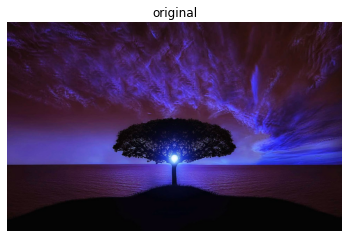

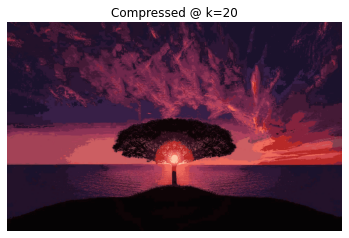

In [44]:
plt.figure(0)
plt.axis('off')
plt.title('original')
plt.imshow(img)
plt.show()
plt.figure(2)
plt.axis('off')
plt.title('Compressed @ k=20')
plt.imshow(newimage_gmm_20)
plt.show()

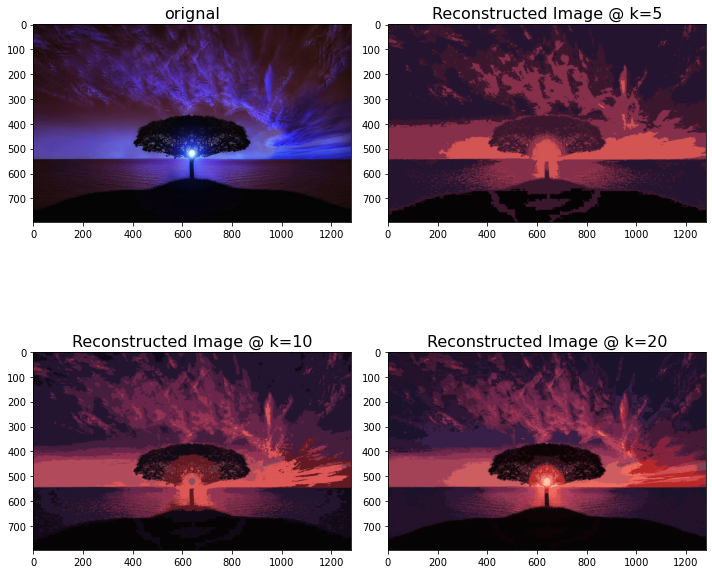

In [45]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))
axs[0, 0].imshow(img)
axs[0, 0].set_title('orignal', size=16)
axs[0, 1].imshow(newimage_gmm_5)
axs[0, 1].set_title('Reconstructed Image @ k=5', size=16)
axs[1, 0].imshow(newimage_gmm_10)
axs[1, 0].set_title('Reconstructed Image @ k=10', size=16)
axs[1, 1].imshow(newimage_gmm_20)
axs[1, 1].set_title('Reconstructed Image @ k=20', size=16)
plt.tight_layout()
plt.show()
